<a href="https://colab.research.google.com/github/LeraKalinina/Demo/blob/main/Visualization_with_Seaborn_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python для Анализа данных

## Домашнее задание 9: Визуализация данных с Seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Вариант Light

### Задача 1

Установите (любой на ваш вкус) общий стиль графиков на весь ноутбук используя функцию set_style

In [2]:
sns.set_style('darkgrid')

### Задача 2

Подгрузите данные datatraining.txt при помощи соответствующей функции библиотеки Pandas. Преобразуйте индекс в datetime index, удалите столбец с датой. Постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец Occupancy)

P.S. используйте функцию sns.pairplot c параметром hue

In [4]:
import pandas as pd
df = pd.read_csv("/content/datatraining.txt")
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
df.info

<bound method DataFrame.info of                      date  Temperature  Humidity  Light         CO2  \
1     2015-02-04 17:51:00        23.18   27.2720  426.0  721.250000   
2     2015-02-04 17:51:59        23.15   27.2675  429.5  714.000000   
3     2015-02-04 17:53:00        23.15   27.2450  426.0  713.500000   
4     2015-02-04 17:54:00        23.15   27.2000  426.0  708.250000   
5     2015-02-04 17:55:00        23.10   27.2000  426.0  704.500000   
...                   ...          ...       ...    ...         ...   
8139  2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8140  2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8141  2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8142  2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8143  2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio  Occupancy  
1          0.004793          1  
2          0.004783          1  
3          0.004

In [6]:
df.date = pd.to_datetime(df.date)
df.index = df.date
df = df.drop('date', axis = 1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc05c6ffef0> (for post_execute):


KeyboardInterrupt: ignored

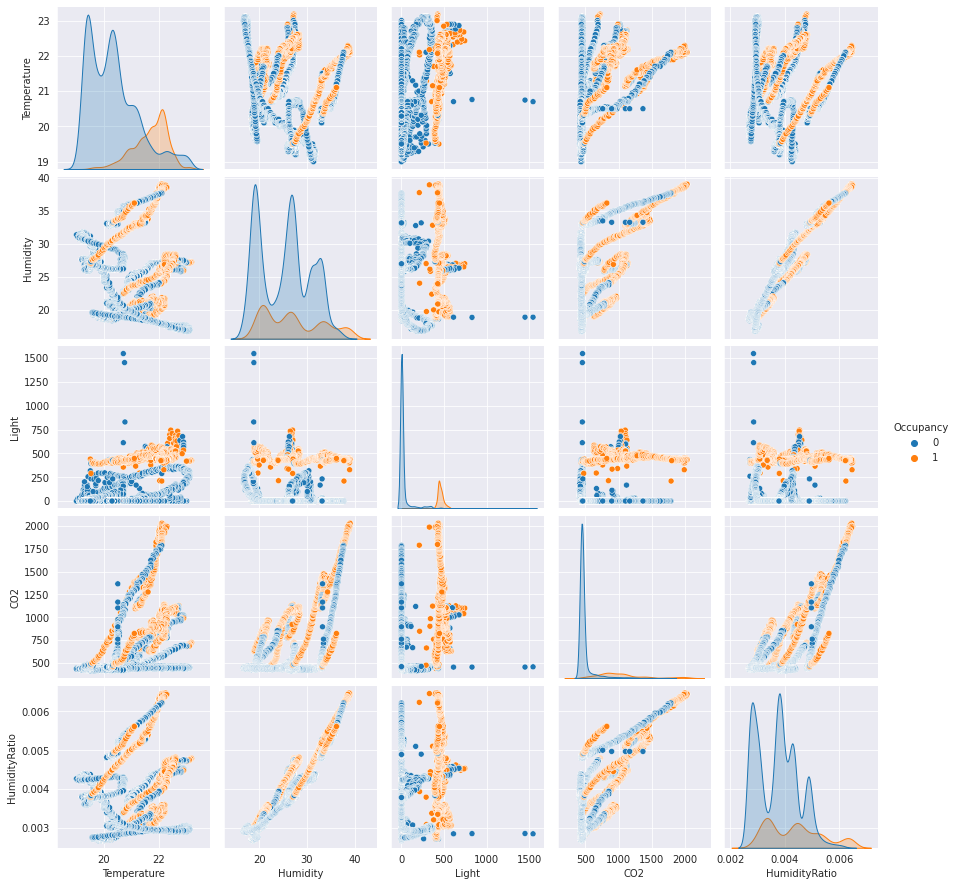

In [7]:
sns.pairplot(df, hue="Occupancy")

### Задача 3

Постройте boxplot всех признаков.

P.S. график должен быть читаемым, т.е.
* отрегулируйте размер графика
* предварительно "отскейлите" все *числовые* признаки, т.е. приведите к стандартному нормальному распределению при помощи функции ниже (Occupancy скейлить не надо (!))

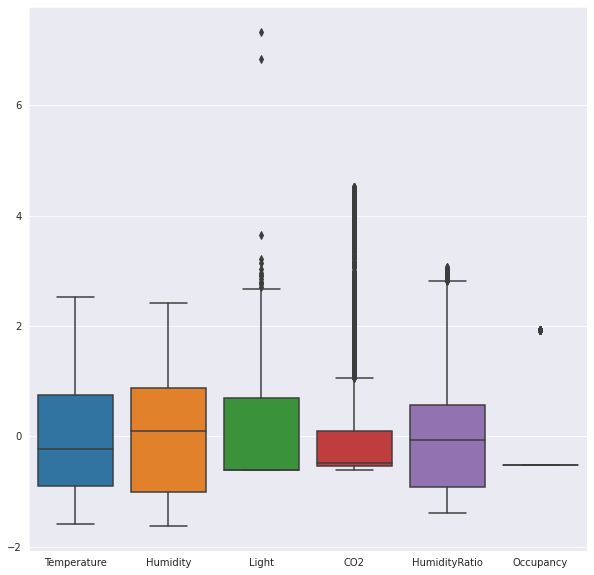

In [8]:
def scale(df):
    return (df - df.mean()) / df.std()
plt.figure(figsize=(10,10))
sns.boxplot(data=scale(df))
plt.show()

### Задача 4

Постройте violinplot всех признаков

P.S. Предварительно приведите их к стандартному нормальному распределению как мы делали в предыдущей задаче

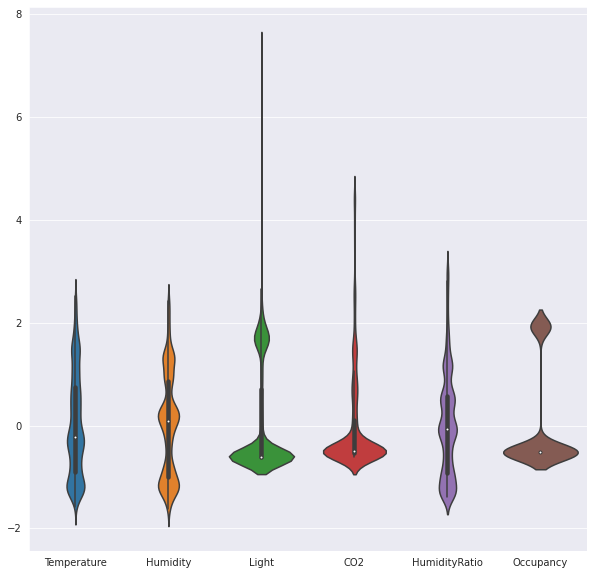

In [ ]:
def scale(df):
    return (df - df.mean()) / df.std()
plt.figure(figsize=(10,10))
sns.violinplot(data=scale(df))
plt.show()

### Задача 5

Нарисуйте heatmap матрицы корреляций. Отрегулируйте масштаб, подберите подходящую палитру

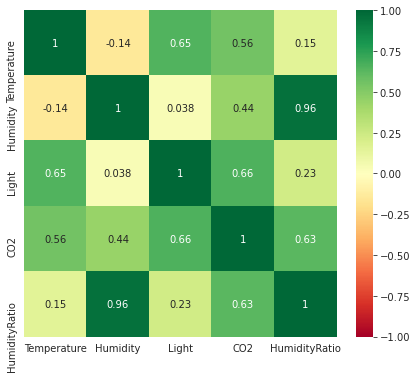

In [ ]:
plt.figure(figsize=(7,6))
corr = df.drop('Occupancy', axis=1).corr()
sns.heatmap(corr, cmap=sns.color_palette("RdYlGn", 1000), vmin=-1, center=0, annot=True)

## Задачи Pro

### Задача 6

Постройте диаграмму присутствия в разбивке по часам и меткам классов. Для этого:
    * создайте новый столбец "hour", отвечающий соответствующему часу 
    * нарисуйте sns.countplot этого столбца в разбивке по Ocuupancy

In [ ]:
df['hour'] = df.index
df['hour'] = df['hour'].apply(pd.to_datetime).apply(lambda x: x.hour)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour
date,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


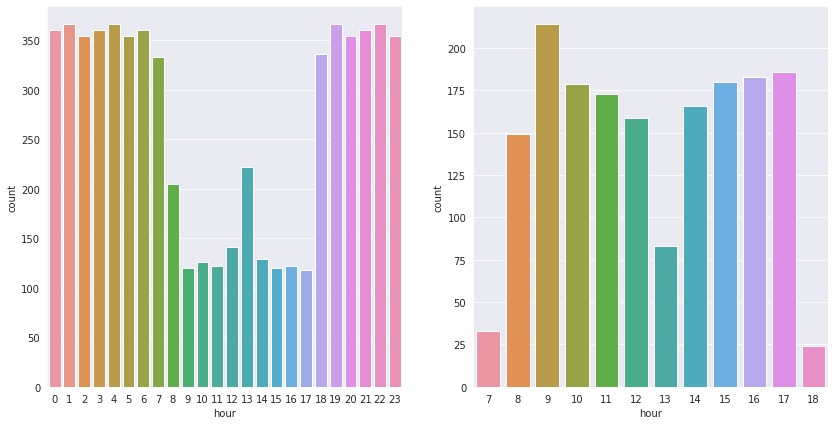

In [ ]:
plt.subplots(1,2, figsize = (14,7))
plt.subplot(1,2,1)
sns.countplot(df['hour'][df['Occupancy']==0])
plt.subplot(1,2,2)
sns.countplot(df['hour'][df['Occupancy']==1])

### Задача 7

Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков. Обратите внимание, что столбец с метками класса Occupancy вместо усреднения нужно взять "как есть", т.е. resample c методом "asfreq" или "bfill".

Постройте jointplot между признаками Light и CO2

In [ ]:
df = df.apply(pd.to_numeric)
df2 = df.copy()
funcs = dict(Temperature ="mean", Humidity ="mean", Light="mean", CO2 ="mean", HumidityRatio ="mean", Occupancy ="bfill") 
df2.resample('30min').agg(funcs).dropna()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 18:00:00,22.838763,27.369892,94.596774,679.771505,0.004711,1.0
2015-02-04 19:00:00,22.179528,27.246000,0.000000,589.516667,0.004504,0.0
2015-02-04 19:30:00,21.954274,27.118280,0.000000,555.833333,0.004422,0.0
2015-02-04 20:30:00,21.625833,26.546667,0.000000,512.883333,0.004241,0.0
2015-02-04 21:00:00,21.508602,26.051505,0.000000,498.040323,0.004131,0.0
...,...,...,...,...,...,...
2015-02-10 06:00:00,20.108065,33.100645,0.000000,447.500000,0.004821,0.0
2015-02-10 07:00:00,20.286000,33.043000,0.000000,450.266667,0.004866,0.0
2015-02-10 07:30:00,20.303172,33.028306,0.000000,452.177419,0.004869,0.0


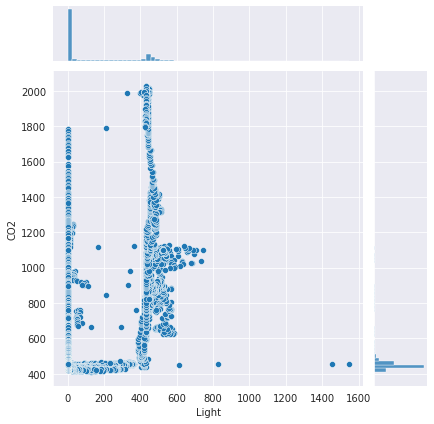

In [ ]:
sns.jointplot(data=df2, x=df2.iloc[:,2], y=df2.iloc[:,3])

### Задача 8

Постройте pairplot по данным после ресемплинга. В чем отличие от графиков в задаче 2? Сделайте вывод

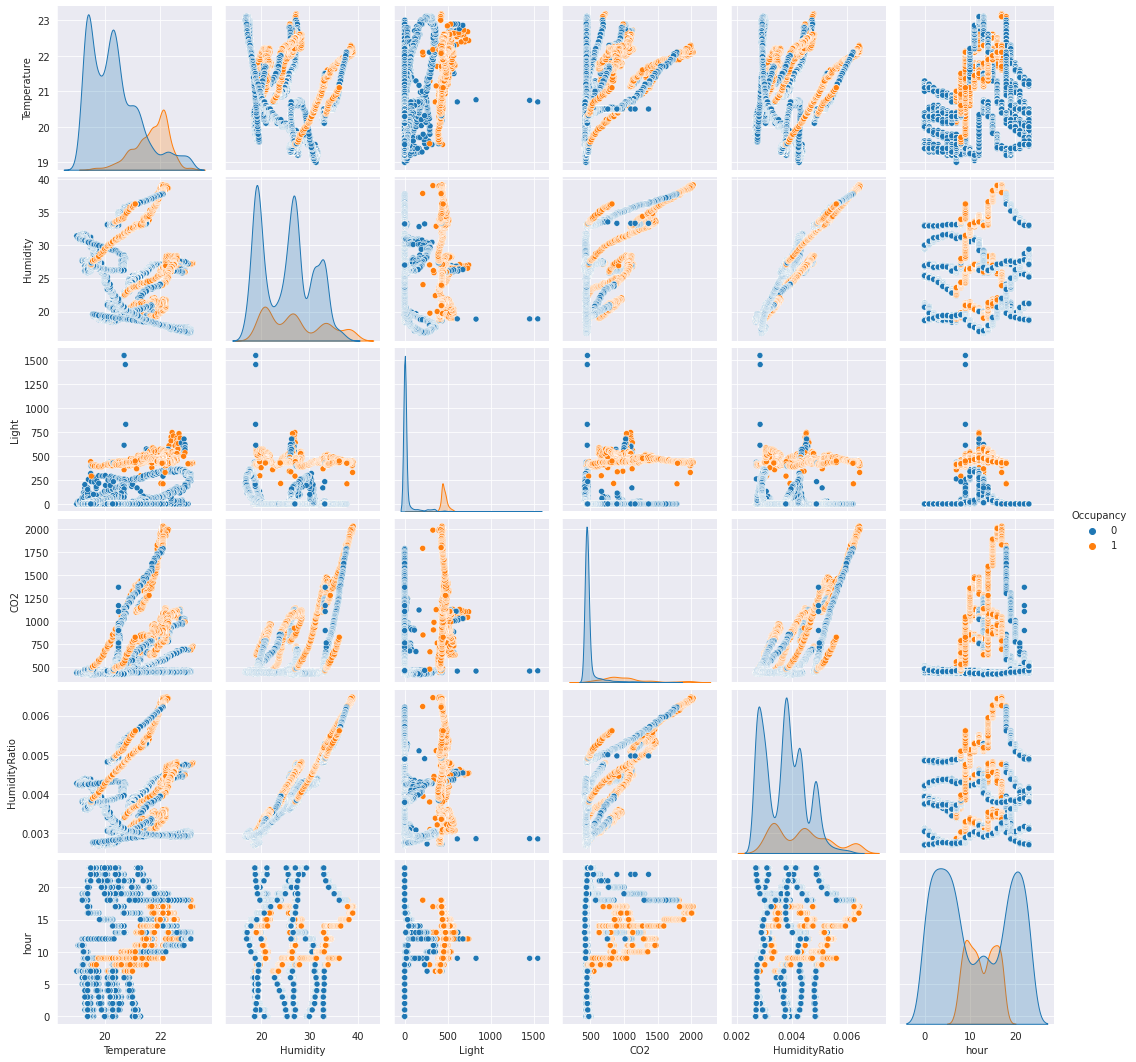

In [ ]:
sns.pairplot(df2, hue="Occupancy")

### Задача 9

Постройте boxplot всех признаков с разбивкой по Occupancy. Для правильной отрисовки необходимо:
    * создать новый текстовый столбец с расшифровкой столбца Occupancy, например, если 0 - то 'No', если 1 - то 'Yes
    * передать этот столбец в качестве соответствующего параметра боксплоту
    * для каждого признака нужен отдельный график

In [ ]:
df['Occupancy'] = df['Occupancy'].apply(lambda x: 'Yes' if x == 1 else 'No')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour
date,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,Yes,17
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,Yes,17
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,Yes,17
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,Yes,17
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,Yes,17


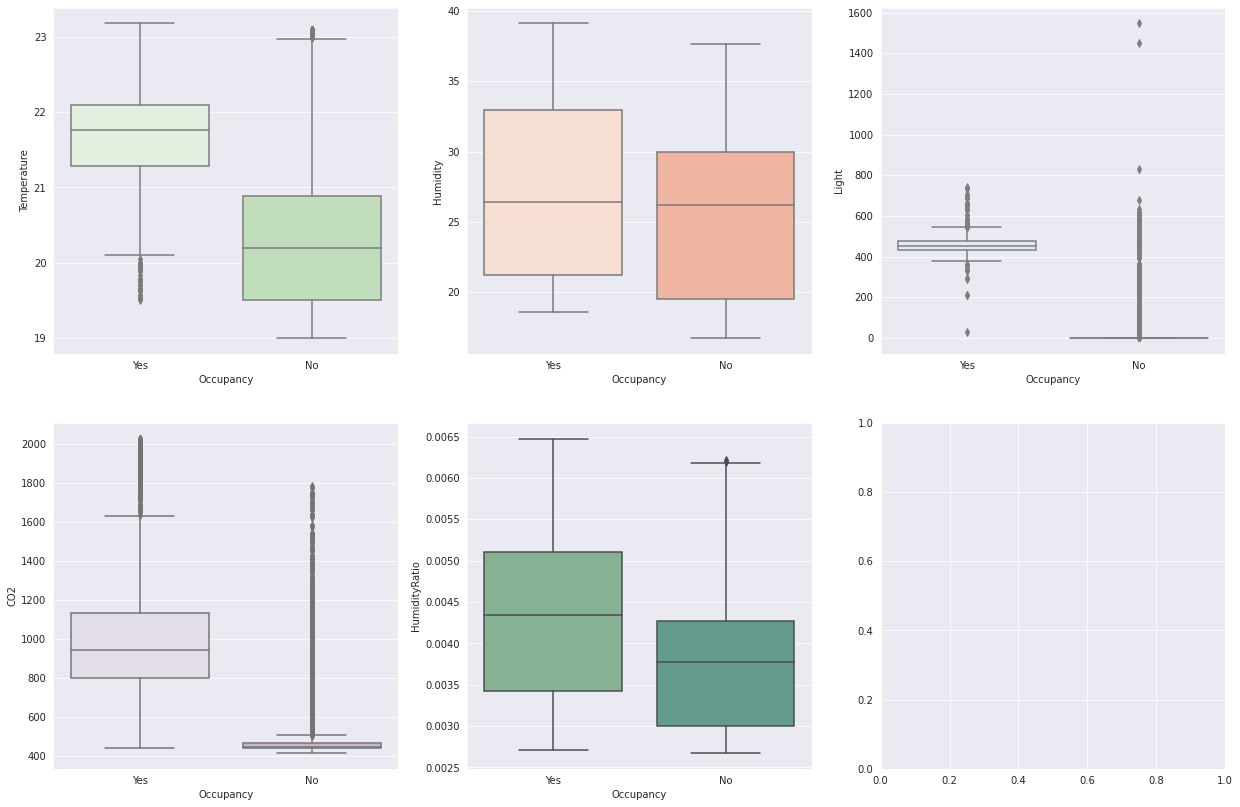

In [ ]:
temp = df["Temperature"]
hum = df["Humidity"]
light = df["Light"]
co = df["CO2"]
rat = df["HumidityRatio"]
occ = df["Occupancy"]

plt.subplots(2,3, figsize = (21,14))
plt.subplot(2,3,1)
sns.boxplot(x=occ, y=temp, palette=sns.color_palette('Greens'))
plt.subplot(2,3,2)
sns.boxplot(x=occ, y=hum, palette=sns.color_palette('Reds'))
plt.subplot(2,3,3)
sns.boxplot(x=occ, y=light, palette=sns.color_palette('Blues'))
plt.subplot(2,3,4)
sns.boxplot(x=occ, y=co, palette=sns.color_palette('PuRd'))
plt.subplot(2,3,5)
sns.boxplot(x=occ, y=rat, palette=sns.color_palette('crest'))

### Задача 10

Принимая во внимание все построенные выше графики, сделайте вывод о взаимосвязях в данных (напишите несколько предложений о том, что вы заметили)

В случае, если помещение занято, все признаки (температура, влажность, углекислый газ) выше, чем если помещение свободно
